# Problem 3

In [1]:
import ema as em
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dm = em.Domain(2,3)
n = dm.dnodes
e = dm.delems

n1 = dm.node('1', 0.0, 0.0)
n2 = dm.node('2', 8.0, 0.0)
n3 = dm.node('3', 8.0, 6.0)
n4 = dm.node('4', 16.0, 6.0)

a = dm.beam('a', n1, n2)
b = dm.beam('b', n2, n3)
c = dm.beam('c', n3, n4)

dm.hinge(a, n1)

dm.fix(n4, 'y')
dm.fix(n1, ['x', 'y', 'rz'])

[rxn-x, rxn-y, rxn-rz]

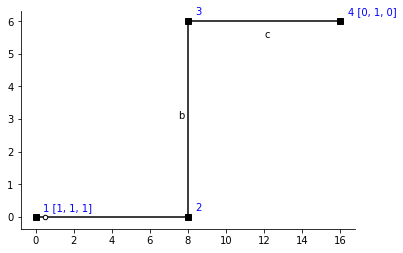

In [3]:
fig, ax = plt.subplots()
em.plot_structure(dm, ax)

In [4]:
A = em.A_matrix(dm).remove('frame-axial').f
A.df

,1,2,3,4,5,6,7,8
a2,-0.125,0.0,0.000000,0.000,0.0,0.0,0.0,-0.0
a3,-0.125,1.0,0.000000,0.000,0.0,0.0,0.0,-0.0
b2,0.000,1.0,0.166667,-0.000,0.0,0.0,0.0,0.0
b3,0.000,0.0,0.166667,-0.000,1.0,0.0,0.0,0.0
c2,0.000,0.0,-0.000000,0.125,1.0,0.0,0.0,0.0
c3,0.000,0.0,-0.000000,0.125,0.0,0.0,1.0,0.0


In [5]:
ka = 1e-3
kb = -2e-3
kc = 2e-3
V = em.V_vector(A)
V.set_item('a2', -ka*a.L/2)
V.set_item('a3',  ka*a.L/2)
V.set_item('b2', -kb*b.L/2)
V.set_item('b3',  kb*b.L/2)
V.set_item('c2', -kc*c.L/2)
V.set_item('c3',  kc*c.L/2)
V.eps.df

,0
a3,0.004
b2,0.006
b3,-0.006
c2,-0.008
c3,0.008
